# Business case

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

Data
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

* 1 = Normal
* 2 = Suspect
* 3 = Pathological

# Business task

To build an effective machine learning model to classify fetal health in order to prevent child and maternal mortality.

# Importing necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,classification_report
from sklearn.ensemble import RandomForestClassifier

# Loading the dataset

In [3]:
df = pd.read_csv('Downloads\\fetal_health.csv')

In [4]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
df.shape

(2126, 22)

# Overview and statistical summary

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


# Data cleaning

In [8]:
# to check for null values
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

There are no null values in the dataset

In [9]:
# changing the data type of target column from float to int
df['fetal_health'] = df['fetal_health'].astype(int)
df['fetal_health']

0       2
1       1
2       1
3       1
4       1
       ..
2121    2
2122    2
2123    2
2124    2
2125    1
Name: fetal_health, Length: 2126, dtype: int32

# EDA

In [10]:
df['fetal_health'].value_counts(normalize=True)*100

1    77.845720
2    13.875823
3     8.278457
Name: fetal_health, dtype: float64

About 77.8% of observations are having normal fetal health, 13.8% are having suspect fetal health and 8.2% are pathological

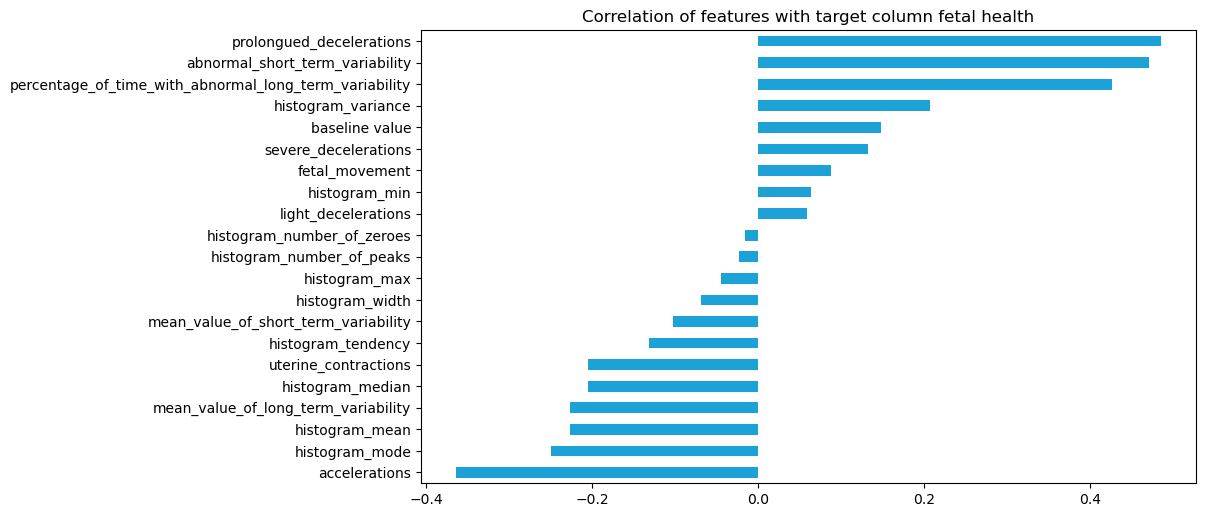

In [16]:
plt.figure(figsize=(10,6),dpi=100)
df.corr()['fetal_health'].sort_values()[:-1].plot(kind='barh',color='#1da2d8')
plt.title('Correlation of features with target column fetal health');

Prolongued_decelerations is highly positively correlated, whereas the accelerations are highly negatively correlated with target column.

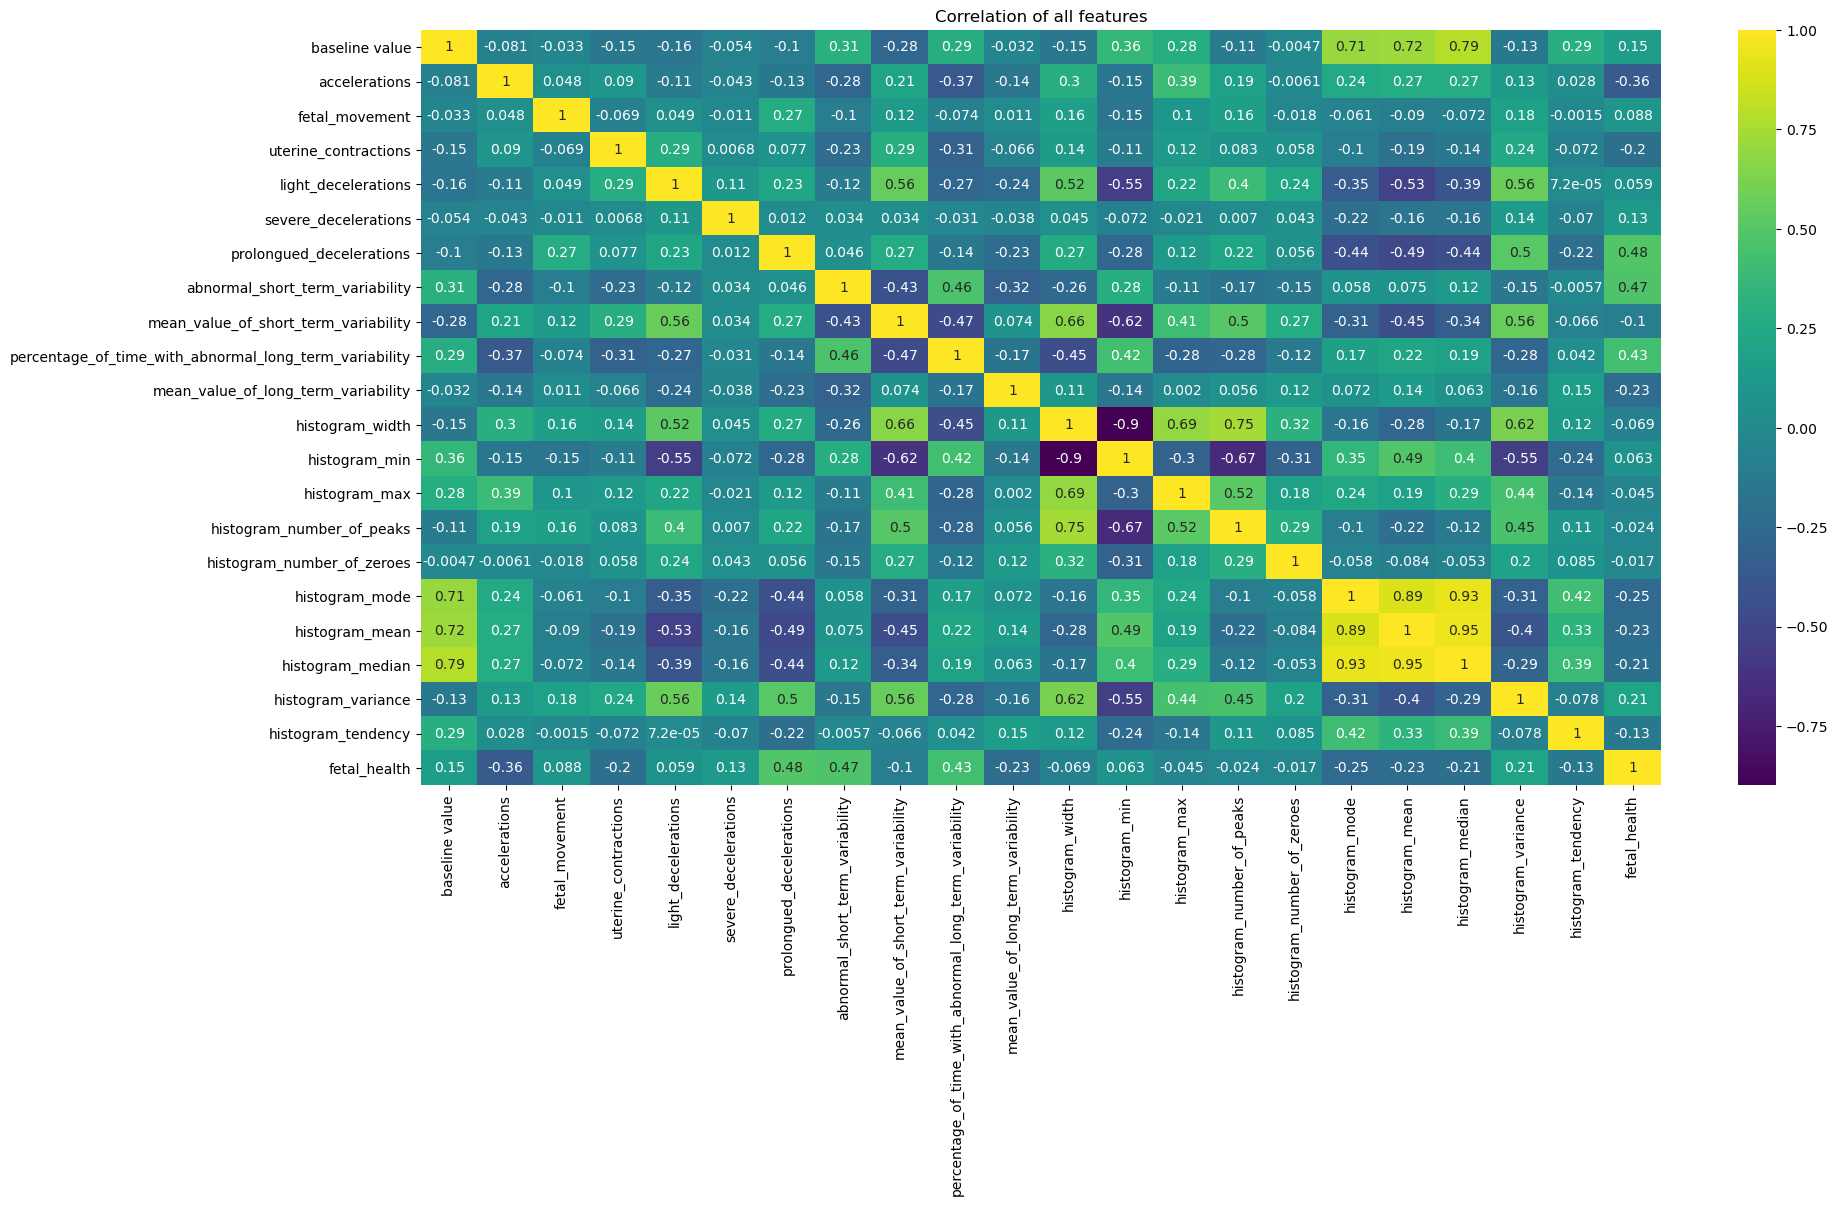

In [17]:
plt.figure(figsize=(20,10),dpi=100)
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.title('Correlation of all features');

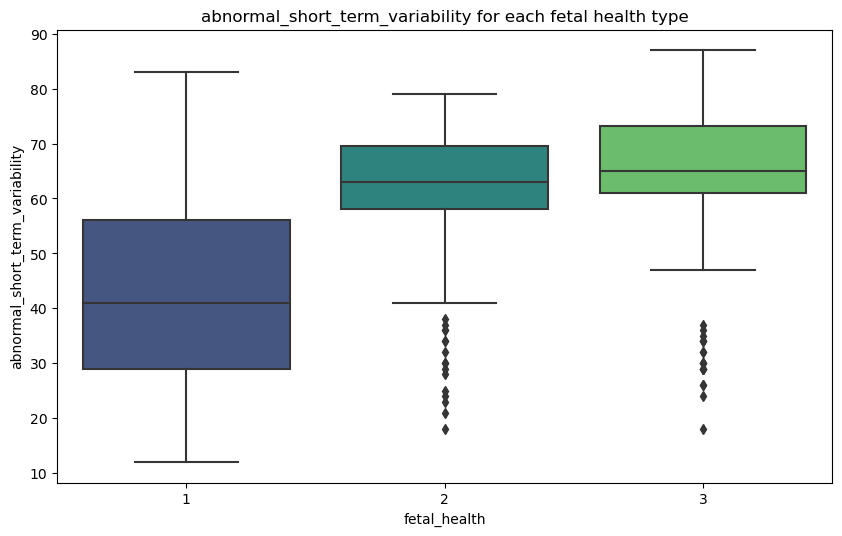

In [19]:
plt.figure(figsize=(10,6),dpi=100)
sns.boxplot(data=df,x='fetal_health',y='abnormal_short_term_variability',palette='viridis')
plt.title('abnormal_short_term_variability for each fetal health type');

Abnormal short term variability for fetal type 3 is relatively higher than 1 and 2.

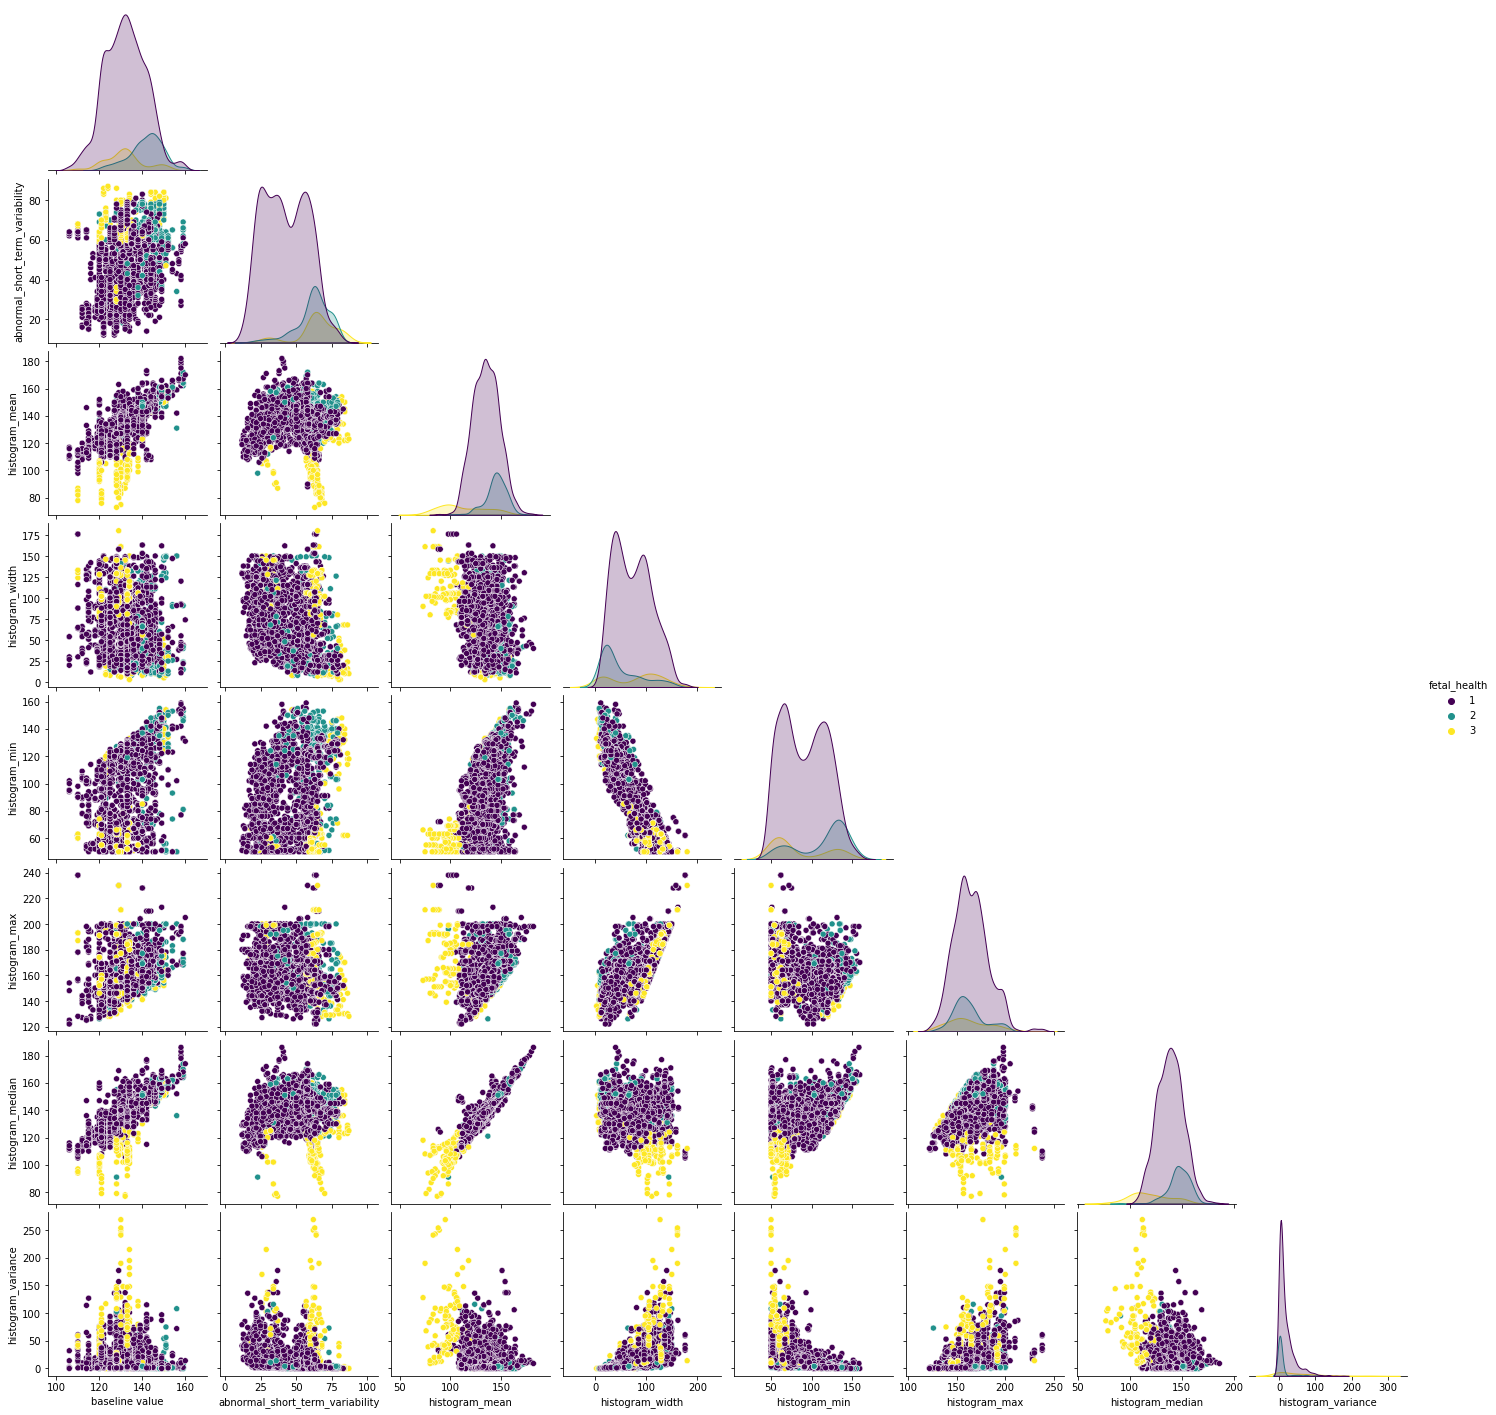

In [22]:
# to understand the distribution between features
sns.pairplot(df[['baseline value','abnormal_short_term_variability','histogram_mean','histogram_width','histogram_min', 'histogram_max','histogram_median','histogram_variance','fetal_health']],hue='fetal_health',corner=True,palette='viridis');

# Creating X,y and performing train - test split

In [23]:
X = df.drop('fetal_health',axis=1)
y=df['fetal_health']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
# instantiating standard scaler
scale = StandardScaler()

In [26]:
# scaling the data
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

# Creating ML model

# Random forest classifier

In [27]:
# choosing random forest classifier
rf_model = RandomForestClassifier(class_weight='balanced')

In [28]:
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier(class_weight='balanced')

In [29]:
rf_model.score(X_test_scaled,y_test)

0.943609022556391

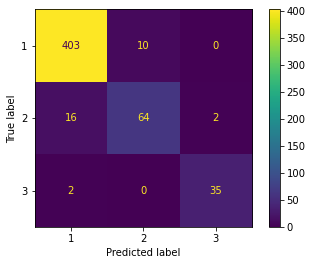

In [31]:
# evaluating the model
plot_confusion_matrix(rf_model,X_test_scaled,y_test);

In [32]:
y_pred = rf_model.predict(X_test_scaled)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       413
           2       0.86      0.78      0.82        82
           3       0.95      0.95      0.95        37

    accuracy                           0.94       532
   macro avg       0.92      0.90      0.91       532
weighted avg       0.94      0.94      0.94       532



The model has performed well with 94% accuracy 

# Random forest with grid search

In [35]:
params = {'n_estimators':[70,90,100,110,120],'criterion' : ["gini", "entropy"],'max_depth':[3,6,9,None],'max_features' : ["auto", "sqrt", "log2"]}

In [36]:
grid_model =GridSearchCV(estimator=rf_model,param_grid=params,cv=5,refit='f1')

In [37]:
%%time
grid_model.fit(X_train_scaled,y_train)

Wall time: 1min 47s


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [70, 90, 100, 110, 120]},
             refit='f1')

In [38]:
grid_model.best_score_

0.9385303917509512

In [39]:
grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 90}

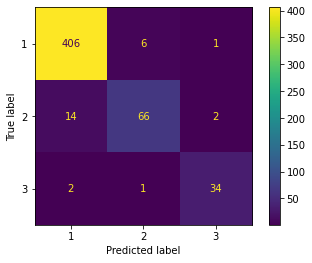

In [40]:
# evaluating the model
plot_confusion_matrix(grid_model,X_test_scaled,y_test);

In [41]:
y_pred = grid_model.predict(X_test_scaled)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       413
           2       0.90      0.80      0.85        82
           3       0.92      0.92      0.92        37

    accuracy                           0.95       532
   macro avg       0.93      0.90      0.91       532
weighted avg       0.95      0.95      0.95       532



This model with grid search has performed slightly better than previous model with 95% accuracy 

# Feature importance

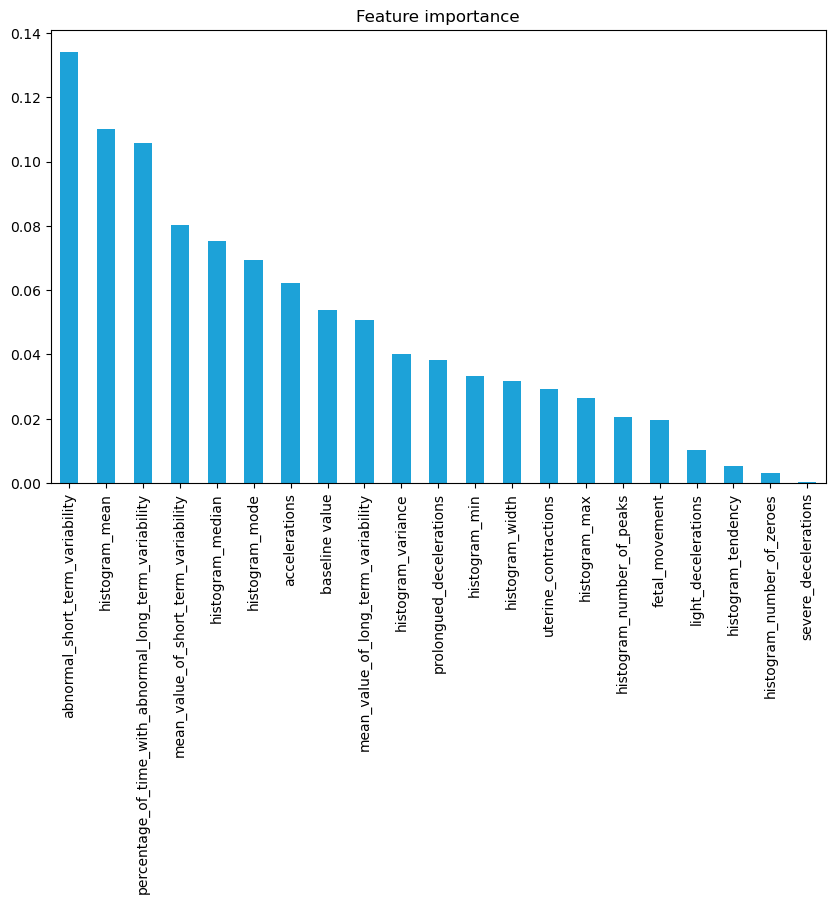

In [44]:
# checking best features
plt.figure(figsize=(10,6),dpi=100)
pd.Series(index=X.columns,data=grid_model.best_estimator_.feature_importances_).sort_values(ascending=False).plot(kind='bar',color='#1da2d8')
plt.title('Feature importance');

The abnormal_short_term_variability is the most important feature that has been used in the prediction of fetal health.

**Thank you!**